# Recipe Review Analysis 
## Part I: Introduction and Exploratory Data Analysis

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/chillyssa/NLP-with-Deep-Learning-Project/blob/main/project_part1.ipynb)

## Introduction 

### Motivation 

As a foodie and avid home chef I am always searching for new recipes to try out to expand my repertoire! The problem I face when turning to the internet to look for a recipe is the vast amount information available online. There are many professional websites as well as personal blogs both of which have their own subset of seemingly countless recipes, including different variations of the virtually the same dish. Each recipe then has a set of reviews and it's baffling to sift through the reviews of each recipe to determine whether or not I should ultimately test out the dish. I need a tool or method to quickly analyze a set of recipe reviews and give me some insight on the reviews and potentially the underlying reason why the recipe is reccomended or not. Enter natural language processing and sentiment analysis!

### Objective

Luckily data is everywhere today, including the food world. The intention of this project is to harness the power of natural language processing by way of sentiment analysis to examine a set of [recipe review data](https://www.kaggle.com/datasets/shuyangli94/food-com-recipes-and-user-interactions) from Food.com's online recipe generator. This data set comes from Kaggle and was originally gathered for the below cited research. 

Generating Personalized Recipes from Historical User Preferences
Bodhisattwa Prasad Majumder*, Shuyang Li*, Jianmo Ni, Julian McAuley
EMNLP, 2019
https://www.aclweb.org/anthology/D19-1613/

## Exploratory Data Analysis

### Loading Data
First up we will load in the data! the data provided comes with a few different sets. For sentiment analysis I will explore the RAW_interactions.csv file which includes the recipe reviews as they were written by the users. 


In [1]:
# mount google drive to import data files - only have to run this once. 
from google.colab import drive
drive.mount('/content/drive')

# import all of the python modules/packages you'll need here
import pandas as pd
import numpy as np

pd.set_option('display.max_colwidth', 0)
path = '/content/drive/MyDrive/NLP-F22/data/RAW_interactions.csv'
df = pd.read_csv(path)
df.head(10)


Mounted at /content/drive


,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for 15 minutes.Added a shake of cayenne and a pinch of salt. Used low fat sour cream. Thanks.
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall evening. Should have doubled it ;)<br/><br/>Second time around, forgot the remaining cumin. We usually love cumin, but didn't notice the missing 1/2 teaspoon!"
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not quite a whole package (10oz) of white chips. Great!
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunko. Everyone loved it.
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprinkling of black pepper. Yum!"
5,52282,120345,2005-05-21,4,very very sweet. after i waited the 2 days i bought 2 more pints of raspberries and added them to the mix. i'm going to add some as a cake filling today and will take a photo.
6,124416,120345,2011-08-06,0,"Just an observation, so I will not rate. I followed this procedure with strawberries instead of raspberries. Perhaps this is the reason it did not work well. Sorry to report that the strawberries I did in August were moldy in October. They were stored in my downstairs fridge, which is very cold and infrequently opened. Delicious and fresh-tasting prior to that, though. So, keep a sharp eye on them. Personally I would not keep them longer than a month. This recipe also appears as #120345 posted in July 2009, which is when I tried it. I also own the Edna Lewis cookbook in which this appears."
7,2000192946,120345,2015-05-10,2,"This recipe was OVERLY too sweet. I would start out with 1/3 or 1/4 cup of sugar and jsut add on from there. Just 2 cups was way too much and I had to go back to the grocery store to buy more raspberries because it made so much mix. Overall, I would but the long narrow box or raspberries. Its a perfect fit for the recipe plus a little extra. I was not impressed with this recipe. It was exceptionally over-sweet. If you make this simple recipe, MAKE SURE TO ADD LESS SUGAR!"
8,76535,134728,2005-09-02,4,Very good!
9,273745,134728,2005-12-22,5,Better than the real!!


First let's just look at the overall size of the data we are dealing with. 

In [2]:
print(df.shape)
print('There are ' + str(df.shape[0]) + ' rows of data!')

(1132367, 5)
There are 1132367 rows of data!


We have 1,132,367 individual ercipe reviews. I am going to take a moment to split these into training data and test data and only focus on what the training data looks like and preprocess only the training data. I will use 70% of the data in training and 30% in testing. I will also export these to their own .csv files for future use.  

In [3]:
from sklearn.model_selection import train_test_split
train_path = '/content/drive/MyDrive/NLP-F22/data/train.csv' 
test_path = '/content/drive/MyDrive/NLP-F22/data/test.csv' 

df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)
df_train.to_csv(train_path)
df_test.to_csv(test_path)

print('Training Data: ' + str(df_train.shape[0]) + ' rows')
print('Test Data: ' + str(df_test.shape[0]) + ' rows')
df_train.head()

Training Data: 792656 rows
Test Data: 339711 rows


,user_id,recipe_id,date,rating,review
520166,1319960,256362,2009-07-15,5,"We had this for dinner last night and it was fabulous. My husband loves pork tenderloin and especially liked this recipe. I only used 1/2 of a tenderloin, but kept the same amount of marinade, so there was plenty left over in the pan to drizzle over the pork once it was cooked."
396288,384043,19023,2008-06-20,5,Oh So good!!!!!!! Thank you for the great recipe. It was the first time I've ever made my own sauce and I was so proud.
737025,39762,83268,2004-05-21,5,"This was really good, my daughter was impressed with how good it tasted and when I told her how simple it was to make she wants to make it sometime soon on her night to cook."
365283,336058,177604,2007-04-17,5,"Well, when the kids keep grabbing more off the serving plate, I know they're good! I used all w.w. pastry flour and the vinegar/milk combo for buttermilk. Added 1 tsp vanilla. It was so easy to make in the blender. I am looking for more protein recipes for the morning that aren't egg based (I have an egg hater). This fits the bill. I used under 1/4 C to make about 24 pancakes. Leftovers! Oh, the texture is a bit different, but I can't describe it. Not crunchy or lumpy though. Thanks, Calee."
921534,527607,236899,2008-07-30,5,oh my. This was absolutely superb. hot and spicy and sweet and the wonderful aromas from 5 spice powder.. truly fantastic. update..i had the late night hungers and wanted something simple but tasty so came back to this. All i can say is its the most flavorful but fast dish i have had. Used ginger paste since i was out of fresh.


After the data is loaded in and we take a look at the first few rows we see that there are 5 columns(features) coming from the data: 

```
user_id, recipe_id, date, rating, review 
```
I'm going to add a couple of extra features to the data that will be useful for ananalyzing the data later. I will add a feature that counts the characters in a review, the words in a review, a column that will hold our preprocessed review(which will be discussed in a bit) and a column that will hold a list of all the individual words in a review, known as a token. After adding these, there will be 9 features as follows: 
```
user_id, recipe_id, date, rating, review, review_len, word_count, p_review, tokens
```


In [4]:
# Adding features for later analysis 
df_train['review_len'] = df_train['review'].astype(str).apply(len)
df_train['word_count'] = df_train['review'].apply(lambda x: len(str(x).split()))
df_train['p_review'] = df_train['review'].astype(str)
df_train['tokens'] = df_train['p_review'].str.lower().str.split()
df_train.head()

,user_id,recipe_id,date,rating,review,review_len,word_count,p_review,tokens
520166,1319960,256362,2009-07-15,5,"We had this for dinner last night and it was fabulous. My husband loves pork tenderloin and especially liked this recipe. I only used 1/2 of a tenderloin, but kept the same amount of marinade, so there was plenty left over in the pan to drizzle over the pork once it was cooked.",280,53,"We had this for dinner last night and it was fabulous. My husband loves pork tenderloin and especially liked this recipe. I only used 1/2 of a tenderloin, but kept the same amount of marinade, so there was plenty left over in the pan to drizzle over the pork once it was cooked.","[we, had, this, for, dinner, last, night, and, it, was, fabulous., my, husband, loves, pork, tenderloin, and, especially, liked, this, recipe., i, only, used, 1/2, of, a, tenderloin,, but, kept, the, same, amount, of, marinade,, so, there, was, plenty, left, over, in, the, pan, to, drizzle, over, the, pork, once, it, was, cooked.]"
396288,384043,19023,2008-06-20,5,Oh So good!!!!!!! Thank you for the great recipe. It was the first time I've ever made my own sauce and I was so proud.,122,25,Oh So good!!!!!!! Thank you for the great recipe. It was the first time I've ever made my own sauce and I was so proud.,"[oh, so, good!!!!!!!, thank, you, for, the, great, recipe., it, was, the, first, time, i've, ever, made, my, own, sauce, and, i, was, so, proud.]"
737025,39762,83268,2004-05-21,5,"This was really good, my daughter was impressed with how good it tasted and when I told her how simple it was to make she wants to make it sometime soon on her night to cook.",175,36,"This was really good, my daughter was impressed with how good it tasted and when I told her how simple it was to make she wants to make it sometime soon on her night to cook.","[this, was, really, good,, my, daughter, was, impressed, with, how, good, it, tasted, and, when, i, told, her, how, simple, it, was, to, make, she, wants, to, make, it, sometime, soon, on, her, night, to, cook.]"
365283,336058,177604,2007-04-17,5,"Well, when the kids keep grabbing more off the serving plate, I know they're good! I used all w.w. pastry flour and the vinegar/milk combo for buttermilk. Added 1 tsp vanilla. It was so easy to make in the blender. I am looking for more protein recipes for the morning that aren't egg based (I have an egg hater). This fits the bill. I used under 1/4 C to make about 24 pancakes. Leftovers! Oh, the texture is a bit different, but I can't describe it. Not crunchy or lumpy though. Thanks, Calee.",505,93,"Well, when the kids keep grabbing more off the serving plate, I know they're good! I used all w.w. pastry flour and the vinegar/milk combo for buttermilk. Added 1 tsp vanilla. It was so easy to make in the blender. I am looking for more protein recipes for the morning that aren't egg based (I have an egg hater). This fits the bill. I used under 1/4 C to make about 24 pancakes. Leftovers! Oh, the texture is a bit different, but I can't describe it. Not crunchy or lumpy though. Thanks, Calee.","[well,, when, the, kids, keep, grabbing, more, off, the, serving, plate,, i, know, they're, good!, i, used, all, w.w., pastry, flour, and, the, vinegar/milk, combo, for, buttermilk., added, 1, tsp, vanilla., it, was, so, easy, to, make, in, the, blender., i, am, looking, for, more, protein, recipes, for, the, morning, that, aren't, egg, based, (i, have, an, egg, hater)., this, fits, the, bill., i, used, under, 1/4, c, to, make, about, 24, pancakes., leftovers!, oh,, the, texture, is, a, bit, different,, but, i, can't, describe, it., not, crunchy, or, lumpy, though., thanks,, calee.]"
921534,527607,236899,2008-07-30,5,oh my. This was absolutely superb. hot and spicy and sweet and the wonderful aromas from 5 spice powder.. truly fantastic. update..i had the late night hungers and wanted something simple but tasty so came back to this. All i can say is its the most flavorful but fast dish i have had. U


Before diving deeper into the reviews, I will just look at some other values about the training data set as a whole. I first will make sure the data doesn't have any null cells where there should be a review. Since this data is a set specifically for reviews, it is unlikely we will have any null review attributes, but this will make sure of that. 

In [5]:
# Remove any null review rows 
df_train = df_train[~df_train["review"].isnull()]

# Rows of data 
print('Individual Recipe Reviews: ' + str(len(df_train)))

# Reviews of each recipe 
recipe_count = df_train['recipe_id'].value_counts()
print('Review Counts by Recipe:')
print(recipe_count)

# Reviews in each rating level 
review_ratings= df_train['rating'].value_counts()
print('\nReview Counts by Rating:')
print(review_ratings)


Individual Recipe Reviews: 792539
Review Counts by Recipe:
2886      1148
27208     1134
89204     1082
39087     1021
67256     941 
         ...  
357037    1   
353958    1   
415053    1   
219026    1   
47944     1   
Name: recipe_id, Length: 198903, dtype: int64

Review Counts by Rating:
5    571716
4    130903
0    42503 
3    28586 
2    9884  
1    8947  
Name: rating, dtype: int64


The largest amount of reviews a single recipe has is 1,148, however, looking at the summary of reviews by recipe, there seem to be several with a low review count. Recipes with a low review count won't be very beneficial to us so I am going to remove the recipes with less than 25 reviews. 

In [6]:
df_train = df_train[df_train.groupby('recipe_id')["recipe_id"].transform('size') >= 25]

# Rows of data 
print('Individual Recipe Reviews: ' + str(len(df_train)))

# Reviews of each recipe 
recipe_count = df_train['recipe_id'].value_counts()
print('Review Counts by Recipe:')
print(recipe_count)

# Reviews in each rating level 
review_ratings= df_train['rating'].value_counts(normalize=True)
print('\nReview Counts by Rating:')
print(review_ratings)



Individual Recipe Reviews: 220761
Review Counts by Recipe:
2886      1148
27208     1134
89204     1082
39087     1021
67256     941 
         ...  
15466     25  
29480     25  
10045     25  
147286    25  
58917     25  
Name: recipe_id, Length: 3551, dtype: int64

Review Counts by Rating:
5    0.758005
4    0.127282
0    0.058357
3    0.031677
2    0.013186
1    0.011492
Name: rating, dtype: float64


Now the data is 3,551 unique recipes all with at least 25 reviews giving a total of 220,761 reviews. Let's take a look at a few of the reviews to see what our actual text data looks like right now. I have chosen 5 reviews at random all from different recipes just to see what kind of text we are dealing with. 

## Preprocessing 

Our data set is currently in it's raw form, that is, straight from the source. That means that all these reviews are in a form that has punctuation, capitalization, potential mispellings, etc. It's the _'Wild West'_ of textual data that a machine learning model will not know how to interpret. We need to take a few steps to clean up or preprocess the reviews to convert it into data that a model can analyze and predict the sentiment behind the review. 

A good first step is to make sure that we are working with the same data type for all reviews. It is likely that these are all text strings anyway, but in the event they are not, this will ensure all review data is of type string.  Additionally, several review entries have emoji like text and punctuation that, to the human eye can be inferred as emotion, but it isn't beneficial for text sentiment analysis so I will also remove all special characters and punctuation. The last thing I will do is convert all text to lower case to standardize the data even further. 



In [7]:
df_train.iloc[[93,777,1234,74300,141340]]

,user_id,recipe_id,date,rating,review,review_len,word_count,p_review,tokens
478681,814473,43509,2009-04-05,5,"These muffins are heavenly! Light, moist and highly recommended! I'd give it five HUNDRED stars if I could!",107,18,"These muffins are heavenly! Light, moist and highly recommended! I'd give it five HUNDRED stars if I could!","[these, muffins, are, heavenly!, light,, moist, and, highly, recommended!, i'd, give, it, five, hundred, stars, if, i, could!]"
353528,40533,17181,2005-11-15,5,"I've had this in my cookbook for awhile but just got around to making it since I needed a good crockpot recipe with our hectic schedule. This was VERY good. Nice and simple but with some fabulous flavors from only a few ingredients. I was skeptical of cinnamon in a stew but will certainly be making this again. Very simple, and very tasty. Thank you.",351,65,"I've had this in my cookbook for awhile but just got around to making it since I needed a good crockpot recipe with our hectic schedule. This was VERY good. Nice and simple but with some fabulous flavors from only a few ingredients. I was skeptical of cinnamon in a stew but will certainly be making this again. Very simple, and very tasty. Thank you.","[i've, had, this, in, my, cookbook, for, awhile, but, just, got, around, to, making, it, since, i, needed, a, good, crockpot, recipe, with, our, hectic, schedule., this, was, very, good., nice, and, simple, but, with, some, fabulous, flavors, from, only, a, few, ingredients., i, was, skeptical, of, cinnamon, in, a, stew, but, will, certainly, be, making, this, again., very, simple,, and, very, tasty., thank, you.]"
647304,29268,22782,2007-02-27,5,"This is by far, the best Spaghetti Sauce I have tasted! All those years of perfecting definitely paid off!",106,19,"This is by far, the best Spaghetti Sauce I have tasted! All those years of perfecting definitely paid off!","[this, is, by, far,, the, best, spaghetti, sauce, i, have, tasted!, all, those, years, of, perfecting, definitely, paid, off!]"
682516,204024,29598,2013-06-25,5,"Loved this marinade. We used boneless, skinless, thighs. Defiinitely will be making this again. Made for Name that Ingredient.",130,19,"Loved this marinade. We used boneless, skinless, thighs. Defiinitely will be making this again. Made for Name that Ingredient.","[loved, this, marinade., we, used, boneless,, skinless,, thighs., defiinitely, will, be, making, this, again., made, for, name, that, ingredient.]"
938560,1597075,82102,2012-05-22,5,Best chicken recipe by far.I cooked as directed,47,8,Best chicken recipe by far.I cooked as directed,"[best, chicken, recipe, by, far.i, cooked, as, directed]"


In [ ]:
import re 

# Convert all review data to stype string 
df_train['p_review'] = df_train['p_review'].astype(str)

# Remove Special Characters 
def clean(txt):
    txt = txt.str.replace(':-\)','')
    txt = txt.str.replace('(<a).*(>).*()', '')
    txt = txt.str.replace('(\xa0)', ' ')
    txt = txt.str.replace('(&amp)', '')
    txt = txt.str.replace('(&gt)', '')
    txt = txt.str.replace('(&lt)', '')
    txt = txt.str.replace('!','')
    txt = txt.str.replace('?','')
    txt = txt.str.replace('.','')
    txt = txt.str.replace(',','')
    txt = txt.str.replace(';','')
    txt = txt.str.replace(':','')
    txt = txt.str.replace('\'','')
    txt = txt.str.replace(':-\(','')
    txt = txt.str.replace(':\)','')
    txt = txt.str.replace(':\(','')
    txt = txt.str.replace("[^a-zA-Z0-9]", " ");
    return txt

df_train['p_review'] = clean(df_train['p_review'])
df_train['p_review'] = df_train['p_review'].str.replace('[^\w\s]', '') 

# Convert all text to lower case
df_train['p_review'] = df_train['p_review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

df_train.head()

Now that we have cleaned up the data a bit, let's look at those random reviews again to see what our reviews look like now. 

In [9]:
df_train.iloc[[93,777,1234,74300,141340]]

,user_id,recipe_id,date,rating,review,review_len,word_count,p_review,tokens
478681,814473,43509,2009-04-05,5,"These muffins are heavenly! Light, moist and highly recommended! I'd give it five HUNDRED stars if I could!",107,18,these muffins are heavenly light moist and highly recommended id give it five hundred stars if i could,"[these, muffins, are, heavenly!, light,, moist, and, highly, recommended!, i'd, give, it, five, hundred, stars, if, i, could!]"
353528,40533,17181,2005-11-15,5,"I've had this in my cookbook for awhile but just got around to making it since I needed a good crockpot recipe with our hectic schedule. This was VERY good. Nice and simple but with some fabulous flavors from only a few ingredients. I was skeptical of cinnamon in a stew but will certainly be making this again. Very simple, and very tasty. Thank you.",351,65,ive had this in my cookbook for awhile but just got around to making it since i needed a good crockpot recipe with our hectic schedule this was very good nice and simple but with some fabulous flavors from only a few ingredients i was skeptical of cinnamon in a stew but will certainly be making this again very simple and very tasty thank you,"[i've, had, this, in, my, cookbook, for, awhile, but, just, got, around, to, making, it, since, i, needed, a, good, crockpot, recipe, with, our, hectic, schedule., this, was, very, good., nice, and, simple, but, with, some, fabulous, flavors, from, only, a, few, ingredients., i, was, skeptical, of, cinnamon, in, a, stew, but, will, certainly, be, making, this, again., very, simple,, and, very, tasty., thank, you.]"
647304,29268,22782,2007-02-27,5,"This is by far, the best Spaghetti Sauce I have tasted! All those years of perfecting definitely paid off!",106,19,this is by far the best spaghetti sauce i have tasted all those years of perfecting definitely paid off,"[this, is, by, far,, the, best, spaghetti, sauce, i, have, tasted!, all, those, years, of, perfecting, definitely, paid, off!]"
682516,204024,29598,2013-06-25,5,"Loved this marinade. We used boneless, skinless, thighs. Defiinitely will be making this again. Made for Name that Ingredient.",130,19,loved this marinade we used boneless skinless thighs defiinitely will be making this again made for name that ingredient,"[loved, this, marinade., we, used, boneless,, skinless,, thighs., defiinitely, will, be, making, this, again., made, for, name, that, ingredient.]"
938560,1597075,82102,2012-05-22,5,Best chicken recipe by far.I cooked as directed,47,8,best chicken recipe by fari cooked as directed,"[best, chicken, recipe, by, far.i, cooked, as, directed]"


Next up I am going to remove some of the words in the reviews that aren't benficial for sentiment analysis. This will include all of the words that appear in human language frequently like 'but', 'is', 'the', etc.; these are what are known as stop words. I will also look at the frequency of each word and see how many times unique words were used. We can safely omit words that were used only once - these will likely be misspellings, typos, units for ingredients, and perhaps quantities. 

In [10]:
# Removing stop words 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = stopwords.words('english')

df_train['p_review'] = df_train['p_review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df_train.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,user_id,recipe_id,date,rating,review,review_len,word_count,p_review,tokens
396288,384043,19023,2008-06-20,5,Oh So good!!!!!!! Thank you for the great recipe. It was the first time I've ever made my own sauce and I was so proud.,122,25,oh good thank great recipe first time ive ever made sauce proud,"[oh, so, good!!!!!!!, thank, you, for, the, great, recipe., it, was, the, first, time, i've, ever, made, my, own, sauce, and, i, was, so, proud.]"
1110400,1127316,51803,2009-01-12,0,"This is a great soup. Only, watch out for the flavor packet that it comes with. It contains MSG, under the name of hydrolyzed soy protein (anything hydrolyzed or autolyzed contains free glutamate). It is a great soup without the flavor packet. Yum!",252,43,great soup watch flavor packet comes contains msg name hydrolyzed soy protein anything hydrolyzed autolyzed contains free glutamate great soup without flavor packet yum,"[this, is, a, great, soup., only,, watch, out, for, the, flavor, packet, that, it, comes, with., it, contains, msg,, under, the, name, of, hydrolyzed, soy, protein, (anything, hydrolyzed, or, autolyzed, contains, free, glutamate)., it, is, a, great, soup, without, the, flavor, packet., yum!]"
510362,1872570,89207,2011-04-02,0,Haven't made this yet but just wanted to let HeyLillie know that I printed the recipe and it was correct. No weird mixup on the measurements. Perhaps your printer had a glitch. That said I am anxious to try this frosting on a ho ho cake. Will post after that.,264,50,havent made yet wanted let heylillie know printed recipe correct weird mixup measurements perhaps printer glitch said anxious try frosting ho ho cake post,"[haven't, made, this, yet, but, just, wanted, to, let, heylillie, know, that, i, printed, the, recipe, and, it, was, correct., no, weird, mixup, on, the, measurements., perhaps, your, printer, had, a, glitch., that, said, i, am, anxious, to, try, this, frosting, on, a, ho, ho, cake., will, post, after, that.]"
563666,278578,106627,2008-01-25,5,great recipe! very easy and tasty. my very picky toddler could not get enough of it so that makes it a keeper!,110,22,great recipe easy tasty picky toddler could get enough makes keeper,"[great, recipe!, very, easy, and, tasty., my, very, picky, toddler, could, not, get, enough, of, it, so, that, makes, it, a, keeper!]"
242052,235493,28559,2005-09-30,5,"Once again, another fantastic recipe from this cook. My lasagna never quite turns out right but this was perfect! Even my picky hubby loved it. The only difference was I used ricotta instead of cottage cheese but actually I think next time I might go ahead and use cottage cheese. This was great! I can't wait to make it again. Thank you so much for posting this. You are a fantastic cook!",396,72,another fantastic recipe cook lasagna never quite turns right perfect even picky hubby loved difference used ricotta instead cottage cheese actually think next time might go ahead use cottage cheese great cant wait make thank much posting fantastic cook,"[once, again,, another, fantastic, recipe, from, this, cook., my, lasagna, never, quite, turns, out, right, but, this, was, perfect!, even, my, picky, hubby, loved, it., the, only, difference, was, i, used, ricotta, instead, of, cottage, cheese, but, actually, i, think, next, time, i, might, go, ahead, and, use, cottage, cheese., this, was, great!, i, can't, wait, to, make, it, again., thank, you, so, much, for, posting, this., you, are, a, fantastic, cook!]"


In [12]:
# Reviewing and Removing infrequent words 
freq = pd.Series(' '.join(df_train['p_review']).split()).value_counts()
less_freq = list(freq[freq ==1].index)
print("Total words in all reviews: " + str(len(freq)))
print("Total words in list of one word used: " + str(len(less_freq)))
print(less_freq[:10])

df_train['p_review'] = df_train['p_review'].apply(lambda x: " ".join(x for x in x.split() if x not in less_freq))


Total words in all reviews: 78858
Total words in list of one word used: 47088
['fridget', 'obvi', 'hoursalso', 'saidnot', 'millennial', 'flashbefore', 'greatkeeper', '4yos', 'worththank', 'momenttrying']


In [13]:
#Saving this data. The last step took nearly 5 hours to run! 
pre_lem_path = '/content/drive/MyDrive/NLP-F22/data/pre_lem_train.csv' 
df_train.to_csv(pre_lem_path)
print("Success!")

Success!


Now that we have removed the infrequent words that won't help us in sentiment analysis, we want to convert all the words into their root form make our training model more efficient. Stemming and lemmatization are both processes that will take any inflected form of a word and modify it to use the root form. 

In [14]:
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
st = PorterStemmer()

# df_train['p_review'] = df_train['p_review'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
df_train['p_review'] = df_train['p_review'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))

#Remove any punctuation added by stemming/lemmatization split
df_train['p_review'] = df_train['p_review'].str.replace('[^\w\s]', '')

df_train.iloc[[93,777,1234,74300,141340]]


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  del sys.path[0]


,user_id,recipe_id,date,rating,review,review_len,word_count,p_review,tokens
478681,814473,43509,2009-04-05,5,"These muffins are heavenly! Light, moist and highly recommended! I'd give it five HUNDRED stars if I could!",107,18,muffin heavenly light moist highly recommended id give five hundred star could,"[these, muffins, are, heavenly!, light,, moist, and, highly, recommended!, i'd, give, it, five, hundred, stars, if, i, could!]"
353528,40533,17181,2005-11-15,5,"I've had this in my cookbook for awhile but just got around to making it since I needed a good crockpot recipe with our hectic schedule. This was VERY good. Nice and simple but with some fabulous flavors from only a few ingredients. I was skeptical of cinnamon in a stew but will certainly be making this again. Very simple, and very tasty. Thank you.",351,65,ive cookbook awhile got around making since needed good crockpot recipe hectic schedule good nice simple fabulous flavor ingredient skeptical cinnamon stew certainly making simple tasty thank,"[i've, had, this, in, my, cookbook, for, awhile, but, just, got, around, to, making, it, since, i, needed, a, good, crockpot, recipe, with, our, hectic, schedule., this, was, very, good., nice, and, simple, but, with, some, fabulous, flavors, from, only, a, few, ingredients., i, was, skeptical, of, cinnamon, in, a, stew, but, will, certainly, be, making, this, again., very, simple,, and, very, tasty., thank, you.]"
647304,29268,22782,2007-02-27,5,"This is by far, the best Spaghetti Sauce I have tasted! All those years of perfecting definitely paid off!",106,19,far best spaghetti sauce tasted year perfecting definitely paid,"[this, is, by, far,, the, best, spaghetti, sauce, i, have, tasted!, all, those, years, of, perfecting, definitely, paid, off!]"
682516,204024,29598,2013-06-25,5,"Loved this marinade. We used boneless, skinless, thighs. Defiinitely will be making this again. Made for Name that Ingredient.",130,19,loved marinade used boneless skinless thigh making made name ingredient,"[loved, this, marinade., we, used, boneless,, skinless,, thighs., defiinitely, will, be, making, this, again., made, for, name, that, ingredient.]"
938560,1597075,82102,2012-05-22,5,Best chicken recipe by far.I cooked as directed,47,8,best chicken recipe fari cooked directed,"[best, chicken, recipe, by, far.i, cooked, as, directed]"


In [3]:
# Repacing token lists with p_review values that are now pre-processed. 
# df_train['tokens'] = df_train['p_review'].str.lower().str.split()
# df_train.head()

# Saving preprocessed training data to a csv to reload without having to run preprocessing again (took ~3hours) 
post_process_path = '/content/drive/MyDrive/NLP-F22/data/pp_train.csv' 
#df_train.to_csv(post_process_path)
df_train = pd.read_csv(post_process_path)
df_train['tokens'] = df_train['p_review'].str.lower().str.split()
df_train.head()

,Unnamed: 0,user_id,recipe_id,date,rating,review,review_len,word_count,p_review,tokens
0,396288,384043,19023,2008-06-20,5,Oh So good!!!!!!! Thank you for the great recipe. It was the first time I've ever made my own sauce and I was so proud.,122,25,oh good thank great recipe first time ive ever made sauce proud,"[oh, good, thank, great, recipe, first, time, ive, ever, made, sauce, proud]"
1,1110400,1127316,51803,2009-01-12,0,"This is a great soup. Only, watch out for the flavor packet that it comes with. It contains MSG, under the name of hydrolyzed soy protein (anything hydrolyzed or autolyzed contains free glutamate). It is a great soup without the flavor packet. Yum!",252,43,great soup watch flavor packet come contains msg name hydrolyzed soy protein anything hydrolyzed autolyzed contains free glutamate great soup without flavor packet yum,"[great, soup, watch, flavor, packet, come, contains, msg, name, hydrolyzed, soy, protein, anything, hydrolyzed, autolyzed, contains, free, glutamate, great, soup, without, flavor, packet, yum]"
2,510362,1872570,89207,2011-04-02,0,Haven't made this yet but just wanted to let HeyLillie know that I printed the recipe and it was correct. No weird mixup on the measurements. Perhaps your printer had a glitch. That said I am anxious to try this frosting on a ho ho cake. Will post after that.,264,50,havent made yet wanted let know printed recipe correct weird mixup measurement perhaps printer glitch said anxious try frosting ho ho cake post,"[havent, made, yet, wanted, let, know, printed, recipe, correct, weird, mixup, measurement, perhaps, printer, glitch, said, anxious, try, frosting, ho, ho, cake, post]"
3,563666,278578,106627,2008-01-25,5,great recipe! very easy and tasty. my very picky toddler could not get enough of it so that makes it a keeper!,110,22,great recipe easy tasty picky toddler could get enough make keeper,"[great, recipe, easy, tasty, picky, toddler, could, get, enough, make, keeper]"
4,242052,235493,28559,2005-09-30,5,"Once again, another fantastic recipe from this cook. My lasagna never quite turns out right but this was perfect! Even my picky hubby loved it. The only difference was I used ricotta instead of cottage cheese but actually I think next time I might go ahead and use cottage cheese. This was great! I can't wait to make it again. Thank you so much for posting this. You are a fantastic cook!",396,72,another fantastic recipe cook lasagna never quite turn right perfect even picky hubby loved difference used ricotta instead cottage cheese actually think next time might go ahead use cottage cheese great cant wait make thank much posting fantastic cook,"[another, fantastic, recipe, cook, lasagna, never, quite, turn, right, perfect, even, picky, hubby, loved, difference, used, ricotta, instead, cottage, cheese, actually, think, next, time, might, go, ahead, use, cottage, cheese, great, cant, wait, make, thank, much, posting, fantastic, cook]"


## Data Analysis 

After cleaning the reviews we can now turn to the analysis of the data! Real quick let's get a visualization of our words in a word cloud for some aesthetic data! 

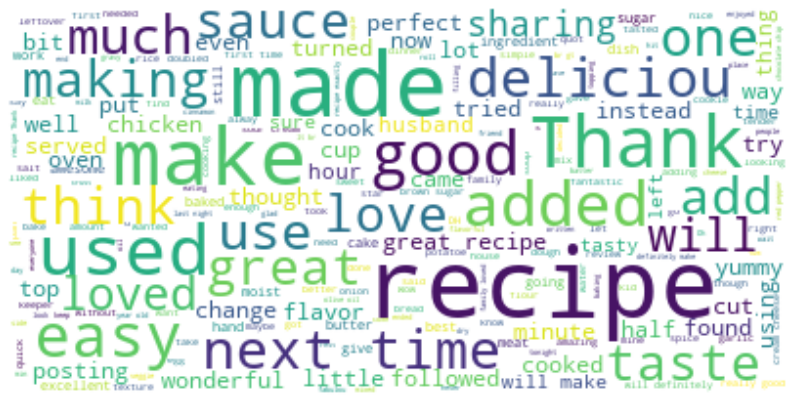

In [9]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt


text = " ".join(r for r in df_train.review)
stopwords = set(STOPWORDS)
wordcl = WordCloud(stopwords = stopwords, background_color='white', max_font_size = 50, max_words = 5000).generate(text)
plt.figure(figsize=(14, 12))
plt.imshow(wordcl, interpolation='bilinear')
plt.axis('off')
plt.show()

Isn't that fun!? But doesn't necessarily tell us anything...

We can add another feature to our data set called polarity. Polarity will count the negative and postiive words within a review which will give us some quantified insight on the sentiment of text. The polarity values range from [-1,1] where -1 is negative, 1 is positive, and 0 is neutral. 

In [14]:

df_train['polarity'] = df_train['p_review'].map(lambda text: TextBlob(str(text)).sentiment.polarity)

df_train.head()

,Unnamed: 0,user_id,recipe_id,date,rating,review,review_len,word_count,p_review,tokens,polarity
0,396288,384043,19023,2008-06-20,5,Oh So good!!!!!!! Thank you for the great recipe. It was the first time I've ever made my own sauce and I was so proud.,122,25,oh good thank great recipe first time ive ever made sauce proud,"[oh, good, thank, great, recipe, first, time, ive, ever, made, sauce, proud]",0.637500
1,1110400,1127316,51803,2009-01-12,0,"This is a great soup. Only, watch out for the flavor packet that it comes with. It contains MSG, under the name of hydrolyzed soy protein (anything hydrolyzed or autolyzed contains free glutamate). It is a great soup without the flavor packet. Yum!",252,43,great soup watch flavor packet come contains msg name hydrolyzed soy protein anything hydrolyzed autolyzed contains free glutamate great soup without flavor packet yum,"[great, soup, watch, flavor, packet, come, contains, msg, name, hydrolyzed, soy, protein, anything, hydrolyzed, autolyzed, contains, free, glutamate, great, soup, without, flavor, packet, yum]",0.666667
2,510362,1872570,89207,2011-04-02,0,Haven't made this yet but just wanted to let HeyLillie know that I printed the recipe and it was correct. No weird mixup on the measurements. Perhaps your printer had a glitch. That said I am anxious to try this frosting on a ho ho cake. Will post after that.,264,50,havent made yet wanted let know printed recipe correct weird mixup measurement perhaps printer glitch said anxious try frosting ho ho cake post,"[havent, made, yet, wanted, let, know, printed, recipe, correct, weird, mixup, measurement, perhaps, printer, glitch, said, anxious, try, frosting, ho, ho, cake, post]",-0.375000
3,563666,278578,106627,2008-01-25,5,great recipe! very easy and tasty. my very picky toddler could not get enough of it so that makes it a keeper!,110,22,great recipe easy tasty picky toddler could get enough make keeper,"[great, recipe, easy, tasty, picky, toddler, could, get, enough, make, keeper]",0.411111
4,242052,235493,28559,2005-09-30,5,"Once again, another fantastic recipe from this cook. My lasagna never quite turns out right but this was perfect! Even my picky hubby loved it. The only difference was I used ricotta instead of cottage cheese but actually I think next time I might go ahead and use cottage cheese. This was great! I can't wait to make it again. Thank you so much for posting this. You are a fantastic cook!",396,72,another fantastic recipe cook lasagna never quite turn right perfect even picky hubby loved difference used ricotta instead cottage cheese actually think next time might go ahead use cottage cheese great cant wait make thank much posting fantastic cook,"[another, fantastic, recipe, cook, lasagna, never, quite, turn, right, perfect, even, picky, hubby, loved, difference, used, ricotta, instead, cottage, cheese, actually, think, next, time, might, go, ahead, use, cottage, cheese, great, cant, wait, make, thank, much, posting, fantastic, cook]",0.420635


Next we look at the distibution of the Review length, Word count and the Polarity. 

Reviews with positive polarity:	203375
Reviews with negative polarity:	11870
Reviews with neutral polarity:	5516


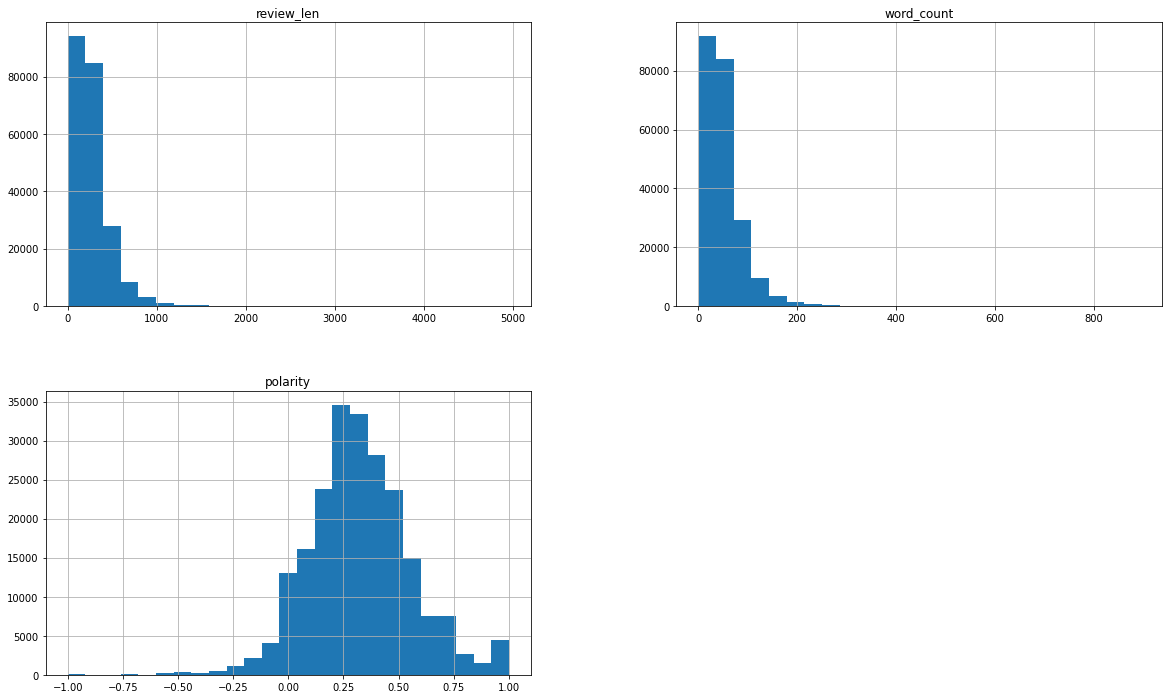

In [15]:
df_train[["review_len", "word_count", "polarity"]].hist(bins=25, figsize=(20,12))

pos_polarity = df_train.loc[df_train.polarity > 0, ['p_review']].values
print('Reviews with positive polarity:\t' + str(len(pos_polarity)))

neg_polarity = df_train.loc[df_train.polarity < 0, ['p_review']].values
print('Reviews with negative polarity:\t' + str(len(neg_polarity)))

neut_polarity = df_train.loc[df_train.polarity == 0, ['p_review']].values
print('Reviews with neutral polarity:\t' + str(len(neut_polarity)))

Looking at our polarity the data are skewed heavily to the right and have a somewhat normal looking distribution with the exception of the polarity right around 0. The majority of the polarity is above 0 which means that a majority of the reviews have a positive sentiment which we can also see from the output of the positive, negative, and neutral counts above the histogram.

Notice that we do have access to the actual rating of the recipe within our data set. Looking at the mean of the polarity grouped by the ratings it seems that our mean is above 0 for all ratings, which matches our histogram. It's interesting that our 0 rating has a relatively high mean where 0 would typically represent a -1 for the lowest polarity score. Knowing how users tend to act toward leaving reviews, It might be beneficial to drop the reviews in our data set with a 0 rating to have a more realistic rating scale. I will leave this for discussion in part 2. 

In [16]:
pol_mean = df_train.groupby('rating')['polarity'].agg([np.mean])
pol_mean.columns = ['mean_polarity']
pol_mean

,mean_polarity
rating,
0,0.273608
1,-0.006575
2,0.102094
3,0.185914
4,0.271529
5,0.352708


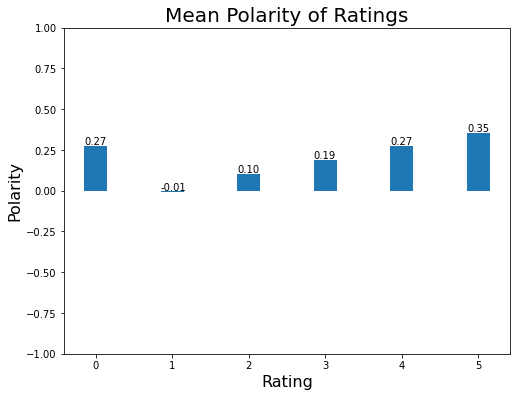

In [19]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.bar(pol_mean.index, pol_mean.mean_polarity, width=0.3)

for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+0.01, str("{:.2f}".format(i.get_height())))

plt.title("Mean Polarity of Ratings", fontsize=20)
plt.ylabel("Polarity", fontsize=16)
plt.xlabel("Rating", fontsize=16)
plt.ylim(-1, 1)
plt.show()

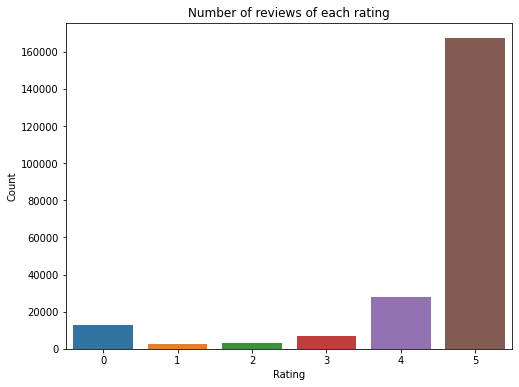

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=df_train)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Number of reviews of each rating")
plt.show()

This is showing that there are a high amount of 5 star reviews which tells me that people who highly reccomend or love the recipes were more inclined to write reviews. 

Next we will look at frequently used words, bigrams and trigrams! 

In [28]:
from sklearn.feature_extraction.text import CountVectorizer


def get_top_n_words(corpus, n=None):
    vec=CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df_train['p_review'].astype('U'), 20)
top_words = pd.DataFrame(common_words, columns = ['word', 'count'])
top_words.head(10)

,word,count
0,recipe,145012
1,made,80351
2,used,76019
3,make,73135
4,great,60531
5,thanks,60444
6,good,57404
7,time,55668
8,easy,44202
9,added,41743


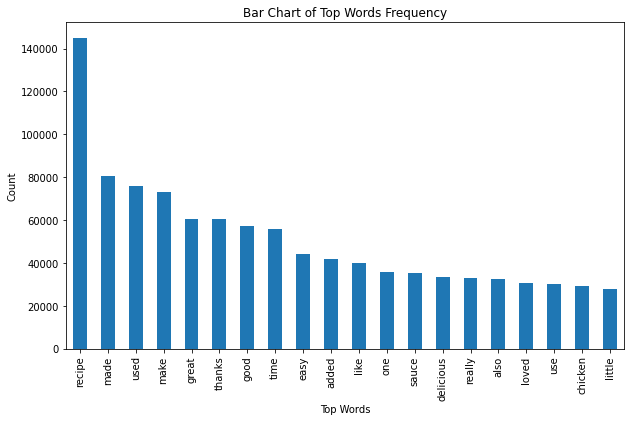

In [30]:
top_words.groupby('word').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel = "Top Words",
    ylabel = "Count",
    title = "Bar Chart of Top Words Frequency"
)

In [33]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_bigrams = get_top_n_bigram(df_train['p_review'].astype('U'), 30)
top_bigrams = pd.DataFrame(common_bigrams, columns=['bigram', "count"])
top_bigrams.head(10)

,bigram,count
0,next time,20189
1,great recipe,13570
2,easy make,10475
3,thanks sharing,9448
4,thanks posting,8868
5,followed recipe,6498
6,really good,6091
7,first time,5318
8,also used,5072
9,thanks much,5025


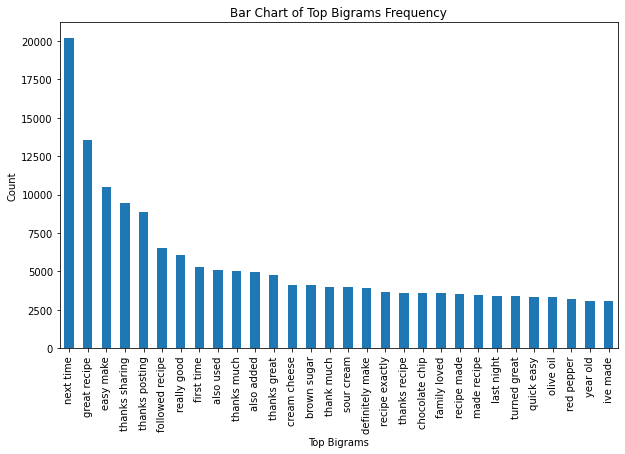

In [34]:
top_bigrams.groupby('bigram').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel = "Top Bigrams",
    ylabel = "Count",
    title = "Bar Chart of Top Bigrams Frequency"
)

In [35]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3,3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_trigrams = get_top_n_trigram(df_train['p_review'].astype('U'), 30)
top_trigrams = pd.DataFrame(common_trigrams, columns=['trigram', "count"])
top_trigrams.head(10)

,trigram,count
0,thanks great recipe,3717
1,followed recipe exactly,2898
2,next time ill,2158
3,thanks sharing recipe,1423
4,made last night,1413
5,red pepper flake,1400
6,next time make,1379
7,think next time,1377
8,whole wheat flour,1235
9,thanks much sharing,1134


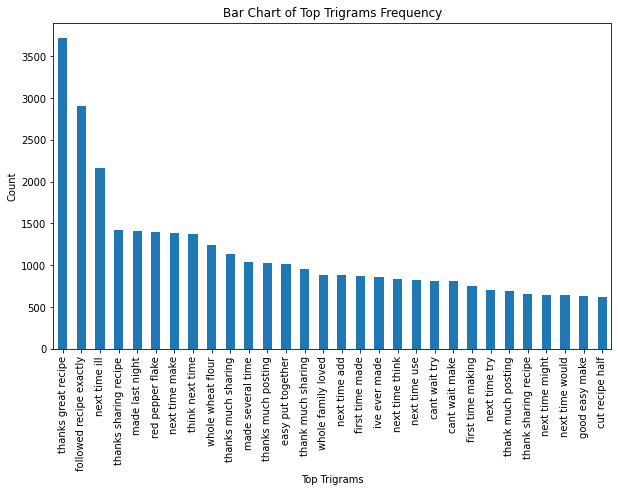

In [36]:
top_trigrams.groupby('trigram').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel = "Top Trigrams",
    ylabel = "Count",
    title = "Bar Chart of Top Trigrams Frequency"
)

Interesting pairings and triples on the bigrams and trigrams. I wonder if the similarity of some of these may affect how well the model does in part 2. Stay tuned for a notebook that includes a baseline model for sentiment analysis on these recipe reviews! 